In [142]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [164]:
data = pd.read_csv('timedata.csv')

In [165]:
data.head()

,Year,Month,Day,Time (UTC),Temp (°C)
0,2023,1,1,00:00,5.6
1,2023,1,1,01:00,4.5
2,2023,1,1,02:00,3.7
3,2023,1,1,03:00,2.8
4,2023,1,1,04:00,1.8


In [288]:
data.dtypes # need time to be an int or a float to be able to use it as a feature

Year                    int64
Month                   int64
Day                     int64
Time (UTC)            float64
Temp (°C)             float64
date           datetime64[ns]
day_of_year             int32
dtype: object

In [167]:
def time_to_float(time_str):
    time_obj = datetime.strptime(time_str, '%H:%M')
    return time_obj.hour + time_obj.minute / 60.0

In [168]:
data["Time (UTC)"] = data["Time (UTC)"].apply(time_to_float)

In [169]:
data.head(42)

,Year,Month,Day,Time (UTC),Temp (°C)
0,2023,1,1,0.0,5.6
1,2023,1,1,1.0,4.5
2,2023,1,1,2.0,3.7
3,2023,1,1,3.0,2.8
4,2023,1,1,4.0,1.8
5,2023,1,1,5.0,1.5
6,2023,1,1,6.0,1.6
7,2023,1,1,7.0,2.1
8,2023,1,1,8.0,2.2
9,2023,1,1,9.0,2.7


In [170]:
#test random forest, svr, knn
X = data[["Year", "Month", "Day", "Time (UTC)"]]

In [171]:
y = data["Temp (°C)"]

In [289]:
data['date'] = pd.to_datetime(dict(year=data["Year"],
								  month=data["Month"],
								  day=data["Day"],
								  hour=data["Time (UTC)"].astype(int)))
data['day_of_year'] = data['date'].dt.dayofyear

<Axes: xlabel='date'>

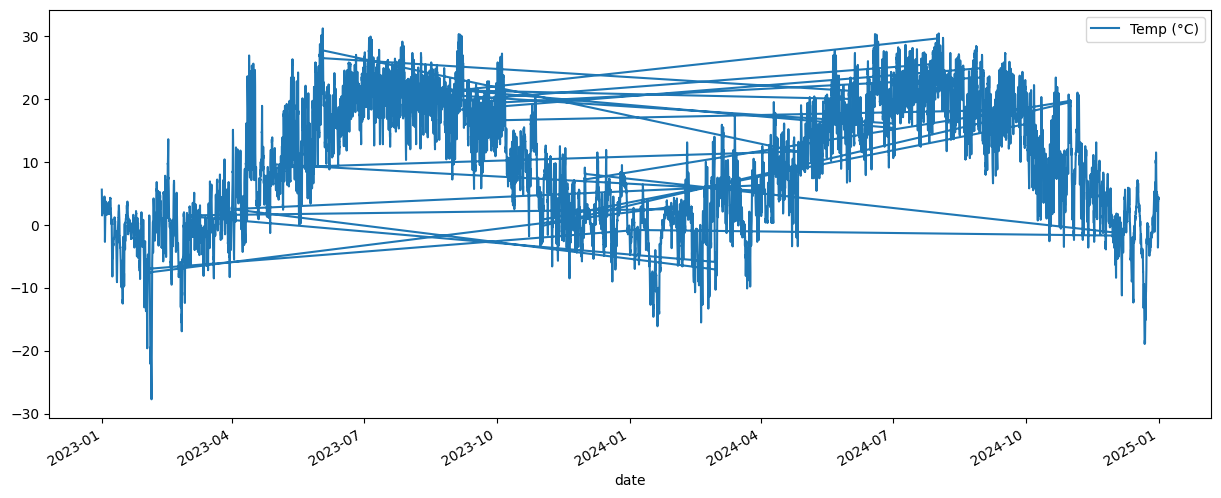

In [290]:
data.plot(x='date', y='Temp (°C)', figsize=(15, 6))    

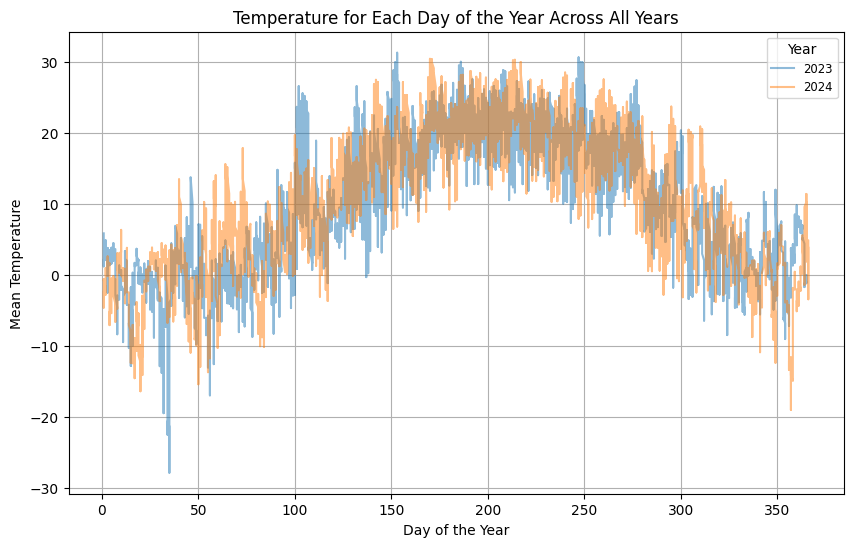

In [251]:
plt.figure(figsize=(10, 6))
for year in data['Year'].unique():
    yearly_data = data[data['Year'] == year]
    jitter = np.random.uniform(-0.4, 0.4, size=len(yearly_data))
    plt.plot(yearly_data['day_of_year'], yearly_data['Temp (°C)'] + jitter, label=year, alpha=0.5)

plt.title('Temperature for Each Day of the Year Across All Years')
plt.xlabel('Day of the Year')
plt.ylabel('Mean Temperature')
plt.legend(title='Year', loc='upper right', fontsize='small', markerscale=2)
plt.grid(True)
plt.show()

In [252]:
X.head()

,Year,Month,Day,Time (UTC)
0,2023,1,1,0.0
1,2023,1,1,1.0
2,2023,1,1,2.0
3,2023,1,1,3.0
4,2023,1,1,4.0


In [253]:
y.isnull().sum()

0

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=80, shuffle=True)

In [255]:
#knn parameters {'p': 1, 'n_neighbors': 5, 'n_jobs': None, 'metric_params': None, 'metric': 'minkowski', 'leaf_size': 40, 'algorithm': 'ball_tree'}
#rfr parameters {'criterion': 'squared_error', 'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 900}
rfr = RandomForestRegressor(criterion='squared_error', n_estimators=900, random_state=80, max_depth=40, min_samples_split=2, min_samples_leaf=1)
knn = KNeighborsRegressor(algorithm='ball_tree', n_neighbors=10, p=1, leaf_size=40, metric='minkowski')

In [256]:
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=40, n_estimators=900, random_state=80)

In [257]:
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=40, n_neighbors=10, p=1)

In [258]:
def evaluatemodel(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return ("MSE:", mse, "MAE:", mae, "R2:", r2)

In [259]:
evaluatemodel(rfr, X_train, y_train)

('MSE:',
 0.17036938485883957,
 'MAE:',
 0.2904529311641516,
 'R2:',
 0.9982028109476685)

In [260]:
evaluatemodel(rfr, X_test, y_test)

('MSE:',
 1.2143910529960038,
 'MAE:',
 0.7822047433583497,
 'R2:',
 0.9872814424215788)

In [261]:
evaluatemodel(knn, X_test, y_test)

('MSE:',
 11.206917184383014,
 'MAE:',
 2.6233798803077795,
 'R2:',
 0.8826277407639612)

In [262]:
def predict_future_temp(year, month, day, time):
    future_date = pd.DataFrame({"Year": [year], "Month": [month], "Day": [day], "Time (UTC)": [time]})
    future_temp = rfr.predict(future_date)
    return future_temp[0]

In [263]:
def predict_future_temp_knn(year, month, day, time):
    future_date = pd.DataFrame({"Year": [year], "Month": [month], "Day": [day], "Time (UTC)": [time]})
    future_temp = knn.predict(future_date)
    return future_temp[0]

In [282]:
predict_future_temp(2025, 1, 15, 15)

-10.461222222222355

In [284]:
predict_future_temp_knn(2025, 1, 24, 14)

-2.08

In [285]:
# can find best parameters for each model
rfr_params = {
    'n_estimators': [600, 700, 800, 900, 1000],
    'criterion': ['squared_error'],
    'max_depth': [30, 40, 50, 60, 70, 80, 90, 100],
    'min_samples_split': [2, 5, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4, 6, 8],

}
knn_dist = {
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [30, 40, 50, 60, 70, 80, 90, 100],
    'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev'],
    'n_neighbors': [5, 10, 15, 20, 25, 30],
    'p': [1, 2],
}

rfrrandomsearch = RandomizedSearchCV(
    estimator=RandomForestRegressor(),
    param_distributions=rfr_params,
    n_iter=500,
    scoring='neg_mean_absolute_error',
    cv=5,
    error_score='raise',
    random_state=42
)
knnrandomsearch = RandomizedSearchCV(
    estimator=KNeighborsRegressor(),
    param_distributions=knn_dist,
    n_iter=500,
    scoring='neg_mean_absolute_error',
    cv=5,
    error_score='raise',
    random_state=42
)
rfrgridsearch = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid=rfr_params,
    scoring='neg_mean_absolute_error',
    cv=5,
    error_score='raise',
)
knngridsearch = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=knn_dist,
    scoring='neg_mean_absolute_error',
    cv=5,
    error_score='raise',
)


In [286]:
knnrandomsearch.fit(X_train, y_train)
print("Best Params: ", knnrandomsearch.best_params_)
print("Best score: % f " % np.abs(knnrandomsearch.best_score_))

Best Params:  {'p': 1, 'n_neighbors': 5, 'metric': 'minkowski', 'leaf_size': 40, 'algorithm': 'ball_tree'}
Best score:  2.497901 


In [338]:
knngridsearch.fit(X_train, y_train)
print("Best Params: ", knngridsearch.best_params_)
print("Best score: % f " % np.abs(knngridsearch.best_score_))

Best Params:  {'algorithm': 'ball_tree', 'leaf_size': 60, 'metric': 'minkowski', 'n_neighbors': 5, 'p': 1}
Best score:  3.178055 


In [ ]:
rfrrandomsearch.fit(X_train, y_train)
print("Best Params: ", rfrrandomsearch.best_params_)
print("Best score: % f " % np.abs(rfrrandomsearch.best_score_))

In [347]:
rfrgridsearch.fit(X_train, y_train)
print("Best Params: ", rfrgridsearch.best_params_)
print("Best score: % f " % np.abs(rfrgridsearch.best_score_))

Best Params:  {'criterion': 'squared_error', 'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 900}
Best score:  2.612288 
